AttributeError: module 'matplotlib.pyplot' has no attribute 'zlabel'

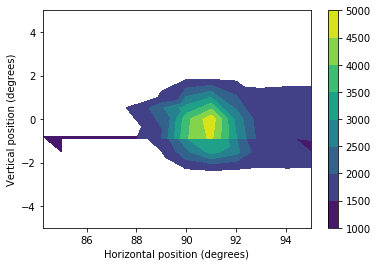

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize, integrate
from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

vac_filename = ["/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/PMT height checks/Smaller aperture 11.19/2018_11_19__15_34_27.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/PMT height checks/Smaller aperture 11.19/2018_11_19__15_39_06.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/PMT height checks/Smaller aperture 11.19/2018_11_19__15_42_55.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/PMT height checks/Smaller aperture 11.19/2018_11_19__15_45_13.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/PMT height checks/Smaller aperture 11.19/2018_11_19__15_52_02.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/PMT height checks/Smaller aperture 11.19/2018_11_19__15_55_54.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/PMT height checks/Smaller aperture 11.19/2018_11_19__16_03_33.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/PMT height checks/Smaller aperture 11.19/2018_11_19__16_08_14.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/PMT height checks/Smaller aperture 11.19/2018_11_19__16_11_41.txt",
               "/global/homes/r/rjsmith/OpticalPlotting/First Xe Run Measurements/PMT height checks/Smaller aperture 11.19/2018_11_19__16_16_40.txt"]
vac_file = []
vac_lines = []
vac_data = []
vac_incidentpower = []
vac_intensities = []
vac_relative_intensities = []
vac_angles = []
vac_err = []
vac_relative_err = []
height = [[0.95,1.035,1.215,1.13,1.085,0.865,0.805,0.835,0.89,0.96]]
height = np.array(height*11)
height = height.T
center = 1.035*np.ones((10,11))
height = (180/np.pi)*(height-center)/5.5

for filename in vac_filename:
    vac_file.append(open(filename))
    vac_data.append(np.loadtxt(filename,skiprows = 12))


'''for i in range(len(vac_file)):
    vac_lines.append(vac_file[i].readlines())
    vac_intensities.append(np.array([datum[1] for datum in vac_data[i]]))
    vac_incidentpower.append(max(vac_intensities[i]))
    vac_relative_intensities.append(vac_intensities[i]/vac_incidentpower[i])
    vac_angles.append(np.array([datum[0] for datum in vac_data[i]]))
    vac_err.append(np.sqrt(20**2+(0.05*vac_intensities[i])**2))
    vac_relative_err.append(vac_err[i]/vac_incidentpower[i])
    '''

angles = []
intensities = []

for i in range(len(vac_file)):
    angles.append([])
    intensities.append([])
    for j in range(len(vac_data[i])):
        angles[i].append(vac_data[i][j][0])
        intensities[i].append(vac_data[i][j][1])
for i in range(9,10):
    for j in range(len(angles[i])):
        angles[i][j] = angles[i][j]-0.75
        
angles = np.array(angles)
height = np.array(height)
intensities = np.array(intensities)

#ax.plot_surface(angles,height,intensities)
plt.contourf(angles,height,intensities)
plt.colorbar()
plt.ylim([-5,5])
plt.xlabel('Horizontal position (degrees)')
plt.ylabel('Vertical position (degrees)')
plt.zlabel('Rate (Hz)')

sigma = 0.8932669507587357


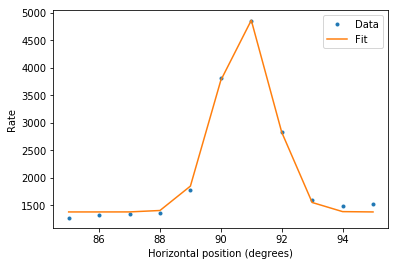

In [5]:
def gauss(x,A,mu,sigma,N):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))+N

vac_fit_params =optimize.curve_fit(gauss,angles[1],intensities[1],p0=[5000,91,1,1200])[0]
vac_fit_cov = optimize.curve_fit(gauss,angles[1],intensities[1],p0=[5000,91,1,1200])[1]
plt.plot(angles[1],intensities[1],'.')
plt.plot(angles[1],gauss(angles[1],vac_fit_params[0],vac_fit_params[1],vac_fit_params[2],vac_fit_params[3]))
plt.xlabel('Horizontal position (degrees)')
plt.ylabel('Rate')
plt.legend(['Data','Fit'])
print("sigma =", vac_fit_params[2])

sigma = 0.848159437315


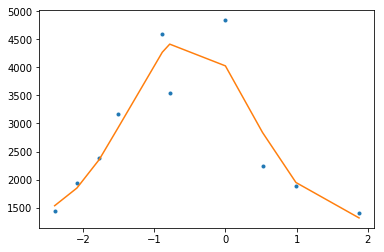

In [227]:
height = height.T
intensities = intensities.T
Z = zip(height[4],intensities[4])
sortedheight = sorted(height[4])
sortedintensities = [y for x,y in sorted(Z)]

def gauss(x,A,mu,sigma,N):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))+N

vac_fit_params =optimize.curve_fit(gauss,sortedheight,sortedintensities,p0=[5000,-1,1,1200])[0]
vac_fit_cov = optimize.curve_fit(gauss,sortedheight,sortedintensities,p0=[5000,-1,1,1200])[1]

plt.plot(sortedheight,sortedintensities,'.')
plt.plot(sortedheight,gauss(sortedheight,vac_fit_params[0],vac_fit_params[1],vac_fit_params[2],vac_fit_params[3]))
print("sigma =", vac_fit_params[2])